In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import datetime

In [7]:
movies = pd.read_csv('data/processed/cmu_movies_augmented.csv')

## Awards Analysis VS metascore and IMDb rating

We can begin to plot Awards in function of metascore and IMDb score.

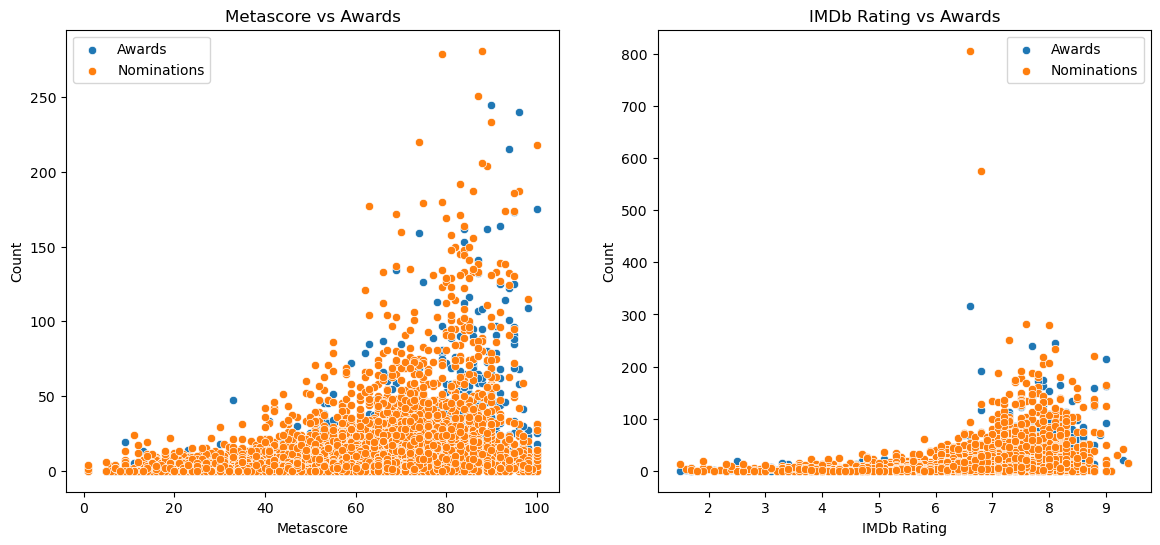

In [12]:
#define a 2 plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Plot metascore vs nb awards in ax1
sns.scatterplot(x="metascore", y="count_award", data=movies, ax=ax1)
sns.scatterplot(x="metascore", y="count_nomination", data=movies, ax=ax1)
ax1.set_title("Metascore vs Awards")
ax1.set_ylabel("Count")
ax1.set_xlabel("Metascore")
ax1.legend(['Awards', 'Nominations'])


# Plot IMDb ratings vs nb awards in ax2
sns.scatterplot(x="imdb_rating", y="count_award", data=movies, ax=ax2)
sns.scatterplot(x="imdb_rating", y="count_nomination", data=movies, ax=ax2)
ax2.set_title("IMDb Rating vs Awards")
ax2.set_ylabel("Count")
ax2.set_xlabel("IMDb Rating")
ax2.legend(['Awards', 'Nominations'])

With the visual analysis, we see than the metascore and the IMDb rating is bigger when film have awards or awards nomination.

In [37]:
#add column nomination true if count_nomination > 0
movies['nomination'] = np.where(movies['count_nomination'] > 0, True, False)
#add column award true if count_award > 0
movies['award'] = np.where(movies['count_award'] > 0, True, False)

#show number of nan values in metascore
print("Number of nan values in metascore: ", movies['metascore'].isna().sum())
#show number of nan values in imdb_rating
print("Number of nan values in imdb_rating: ", movies['imdb_rating'].isna().sum())
#show number of total movies
print("Number of total movies: ", movies.shape[0])

#show number of nan values in award
print("Number of nan values in award: ", movies['award'].isna().sum())

#drop nan values in metascore and imdb_rating
movies = movies.dropna(subset=['metascore', 'imdb_rating'])

Number of nan values in metascore:  759
Number of nan values in imdb_rating:  1
Number of total movies:  8529
Number of nan values in award:  0


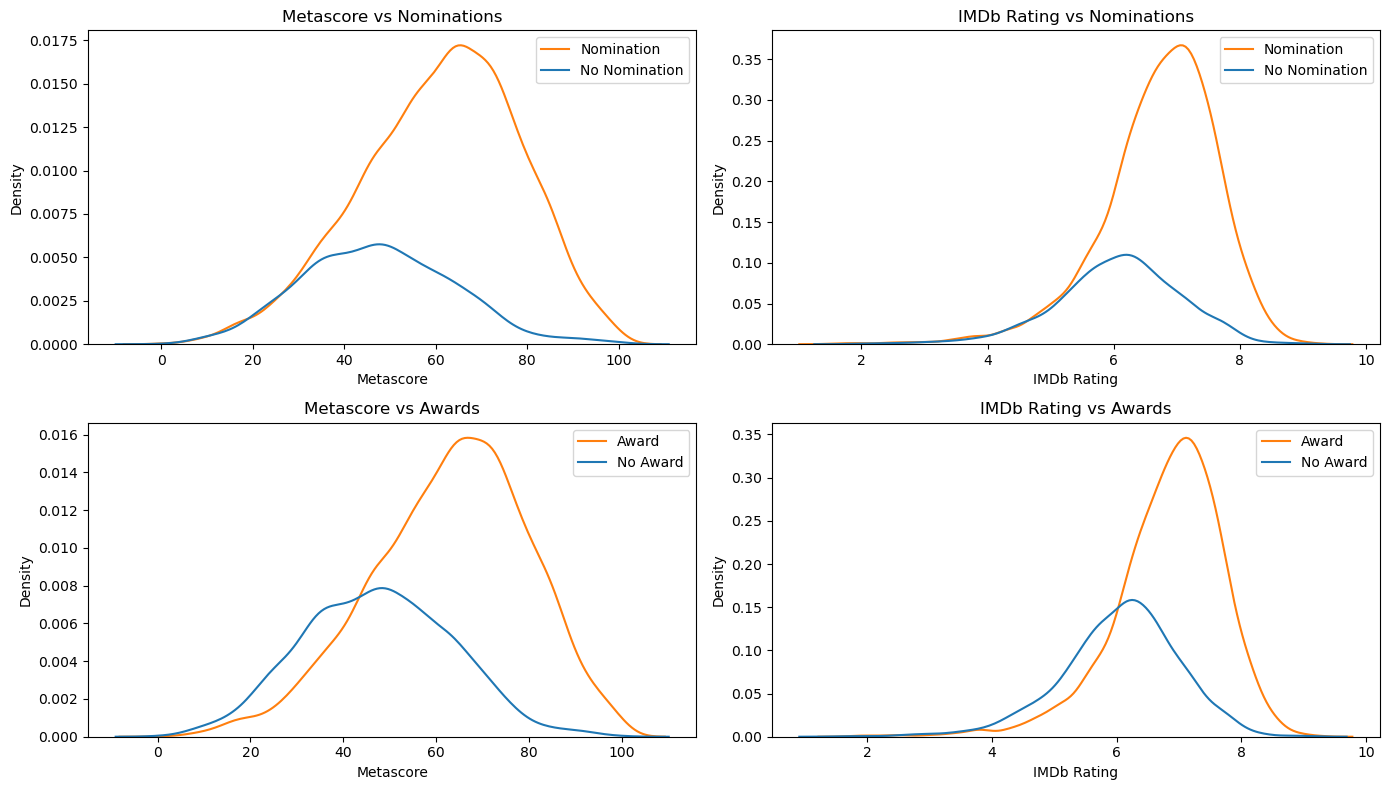

In [38]:
#define a 2 plot
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]

sns.kdeplot(data=movies, x='metascore', hue='nomination', ax=ax1)
sns.kdeplot(data=movies, x='imdb_rating', hue='nomination', ax=ax2)
ax1.set_title("Metascore vs Nominations")
ax1.set_ylabel("Density")
ax1.set_xlabel("Metascore")
ax1.legend(['Nomination', 'No Nomination'])
ax2.set_title("IMDb Rating vs Nominations")
ax2.set_ylabel("Density")
ax2.set_xlabel("IMDb Rating")
ax2.legend(['Nomination', 'No Nomination'])


sns.kdeplot(data=movies, x='metascore', hue='award', ax=ax3)
sns.kdeplot(data=movies, x='imdb_rating', hue='award', ax=ax4)
ax3.set_title("Metascore vs Awards")
ax3.set_ylabel("Density")
ax3.set_xlabel("Metascore")
ax3.legend(['Award', 'No Award'])
ax4.set_title("IMDb Rating vs Awards")  
ax4.set_ylabel("Density")
ax4.set_xlabel("IMDb Rating")
ax4.legend(['Award', 'No Award'])

#rescale plot
plt.tight_layout()

The metascore and IMDb seem to be bigger when the movie has an awards nomination or awards. We can ask ourselves if a nomination is enough to get a better score?

We can try to estimate the metascore and IMDb rating in function of nomination award and award

In [46]:
import statsmodels.formula.api as smf

def linear_regression_helper(formula, df):
    # We use the ols function that allows us to specify a formula
    model = smf.ols(formula=formula, data=df)
    results = model.fit()
    print("The summary of the model for", formula, "is:")
    display(results.summary())
    return results

# Linear regression for metascore vs nomination
results = linear_regression_helper('metascore ~ nomination', movies)
# Linear regression for metascore vs award
results = linear_regression_helper('metascore ~ award', movies)
# Linear regression for imdb_rating vs nomination
results = linear_regression_helper('imdb_rating ~ nomination', movies)
# Linear regression for imdb_rating vs award
results = linear_regression_helper('imdb_rating ~ award', movies)

The summary of the model for metascore ~ nomination is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     892.2
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.14e-185
Time:                        16:45:17   Log-Likelihood:                -33132.
No. Observations:                7770   AIC:                         6.627e+04
Df Residuals:                    7768   BIC:                         6.628e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             47.4607      0.393    120.900      0.000      46.691      48.230
nomination[T.True]    13.5147      0.452     29.869      0.000      12.628      14.402
==============================================================================
Omnibus:                       74.333   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.939
Skew:                          -0.222   Prob(JB):                     8.80e-17
Kurtosis:                       2.824   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary of the model for metascore ~ award is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1517.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.44e-303
Time:                        16:45:17   Log-Likelihood:                -32861.
No. Observations:                7770   AIC:                         6.573e+04
Df Residuals:                    7768   BIC:                         6.574e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.3422      0.325    145.863      0.000      46.706      47.978
award[T.True]    15.5307      0.399     38.953      0.000      14.749      16.312
==============================================================================
Omnibus:                       84.968   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.788
Skew:                          -0.251   Prob(JB):                     1.43e-19
Kurtosis:                       2.877   Cond. No.                         3.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary of the model for imdb_rating ~ nomination is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     705.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.72e-149
Time:                        16:45:17   Log-Likelihood:                -10476.
No. Observations:                7770   AIC:                         2.096e+04
Df Residuals:                    7768   BIC:                         2.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.0773      0.021    285.818      0.000       6.036       6.119
nomination[T.True]     0.6510      0.025     26.564      0.000       0.603       0.699
==============================================================================
Omnibus:                      999.358   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1907.564
Skew:                          -0.823   Prob(JB):                         0.00
Kurtosis:                       4.783   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary of the model for imdb_rating ~ award is:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1263.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.21e-256
Time:                        16:45:17   Log-Likelihood:                -10229.
No. Observations:                7770   AIC:                         2.046e+04
Df Residuals:                    7768   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0573      0.018    343.519      0.000       6.023       6.092
award[T.True]     0.7697      0.022     35.533      0.000       0.727       0.812
==============================================================================
Omnibus:                     1128.782   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2395.764
Skew:                          -0.874   Prob(JB):                         0.00
Kurtosis:                       5.084   Cond. No.                         3.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a positif link in the four case. Having an award rather than just a nomination improves more the metascore and IMDb rate.
In this analysis, we don't know if the dataset is balanced or if there exists some confounder variable.

In [47]:
display(movies)

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12,True,True
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22,True,True
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2,True,True
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8524,25920477,/m/0b6lqyd,Source Code,147332697.0,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2011-03-11,tt0945513,movie/source-code,7.5,540377.0,74.0,8,1,True,True
8525,4492078,/m/0c5clj,How to Eat Fried Worms,13040527.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",2006-08-25,tt0462346,movie/how-to-eat-fried-worms,5.3,5883.0,56.0,2,1,True,True
8526,54540,/m/0f7hw,Coming to America,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",1988-06-29,tt0094898,movie/coming-to-america,7.1,219010.0,47.0,5,5,True,True
8527,1918494,/m/0660qx,State and Main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000-08-26,tt0120202,movie/state-and-main,6.7,21900.0,75.0,8,7,True,True


questions ?

try to balance dataset (have nomination or not)
- in function of genre ?
    - group by genre and count --> wich count ? number of awards/nomination, number of movie, meanmetascore, awards/number awards in categorie
- langugage ?
- countries ?
- runtime ?
- release date ? --> great because some number of awards by year / plot of film by year 

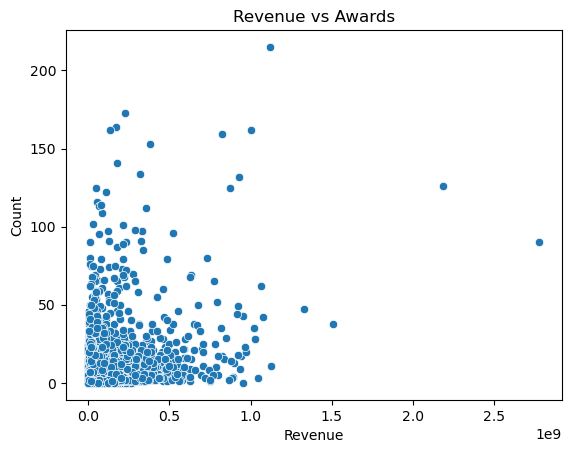

In [48]:
#Plot revenu bs award
sns.scatterplot(x="revenue", y="count_award", data=movies)
plt.title("Revenue vs Awards")
plt.ylabel("Count")
plt.xlabel("Revenue")
plt.show()

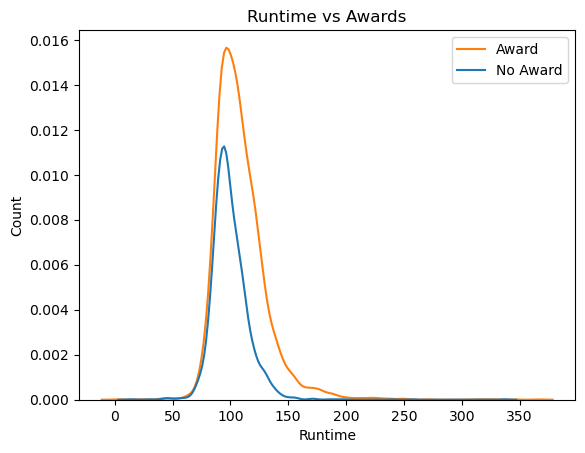

In [112]:
#plot runtime vs award
sns.kdeplot(hue="award", x="runtime", data=movies)
plt.title("Runtime vs Awards")
plt.ylabel("Count")
plt.xlabel("Runtime")
plt.legend(['Award', 'No Award'])
plt.show()




In [53]:
def extract_list(row, col_name):
    try:
        values_dict = ast.literal_eval(row[col_name])
        return list(values_dict.values())
    except:
        return []

In [55]:
movies_extracted_genre = movies.copy()

movies_extracted_genre['extracted_genre'] = movies_extracted_genre.apply(lambda row: extract_list(row, 'genres'), axis=1)

exploxed_genres = movies_extracted_genre.explode('extracted_genre')

display(exploxed_genres)

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,extracted_genre
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Thriller
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Science Fiction
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Horror
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Adventure
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,Supernatural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8527,1918494,/m/0660qx,State and Main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000-08-26,tt0120202,movie/state-and-main,6.7,21900.0,75.0,8,7,True,True,2000.0,Americana
8527,1918494,/m/0660qx,State and Main,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000-08-26,tt0120202,movie/state-and-main,6.7,21900.0,75.0,8,7,True,True,2000.0,Comedy
8528,34980460,/m/0g4pl34,Knuckle,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011-01-21,tt1606259,movie/knuckle,6.8,3194.0,65.0,4,1,True,True,2011.0,Biographical film
8528,34980460,/m/0g4pl34,Knuckle,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011-01-21,tt1606259,movie/knuckle,6.8,3194.0,65.0,4,1,True,True,2011.0,Drama


Number of nomination by genre by group by: 


extracted_genre
Drama                 3519
Comedy                1925
Thriller              1469
Romance Film          1358
World cinema          1104
                      ... 
Anthropology             0
Pornographic movie       0
Breakdance               0
Pinku eiga               0
Softcore Porn            0
Name: nomination, Length: 314, dtype: int64

Number of awards by genre by group by: 


extracted_genre
Drama                       3200
Comedy                      1638
Thriller                    1214
Romance Film                1192
World cinema                1060
                            ... 
Libraries and librarians       0
Giallo                         0
Kitchen sink realism           0
Softcore Porn                  0
Breakdance                     0
Name: award, Length: 314, dtype: int64

Number of genre by genre by group by: 


extracted_genre
Drama                   4331
Comedy                  2667
Thriller                1928
Romance Film            1722
Action                  1395
                        ... 
Point of view shot         1
Political Documetary       1
Psycho-biddy               1
Psychological horror       1
Ealing Comedies            1
Name: extracted_genre, Length: 314, dtype: int64

'percent of awards by film: 0.6828252788104089'

Number of nomination by genre divide by number of film by genre: 


extracted_genre
Chinese Movies       0.900763
Biographical film    0.897119
Biopic [feature]     0.893204
World cinema         0.890323
Costume drama        0.885350
                       ...   
Political cinema     0.655172
Sports               0.654930
Culture & Society    0.654255
Gangster Film        0.640625
Documentary          0.623672
Length: 66, dtype: float64

<Axes: xlabel='extracted_genre'>

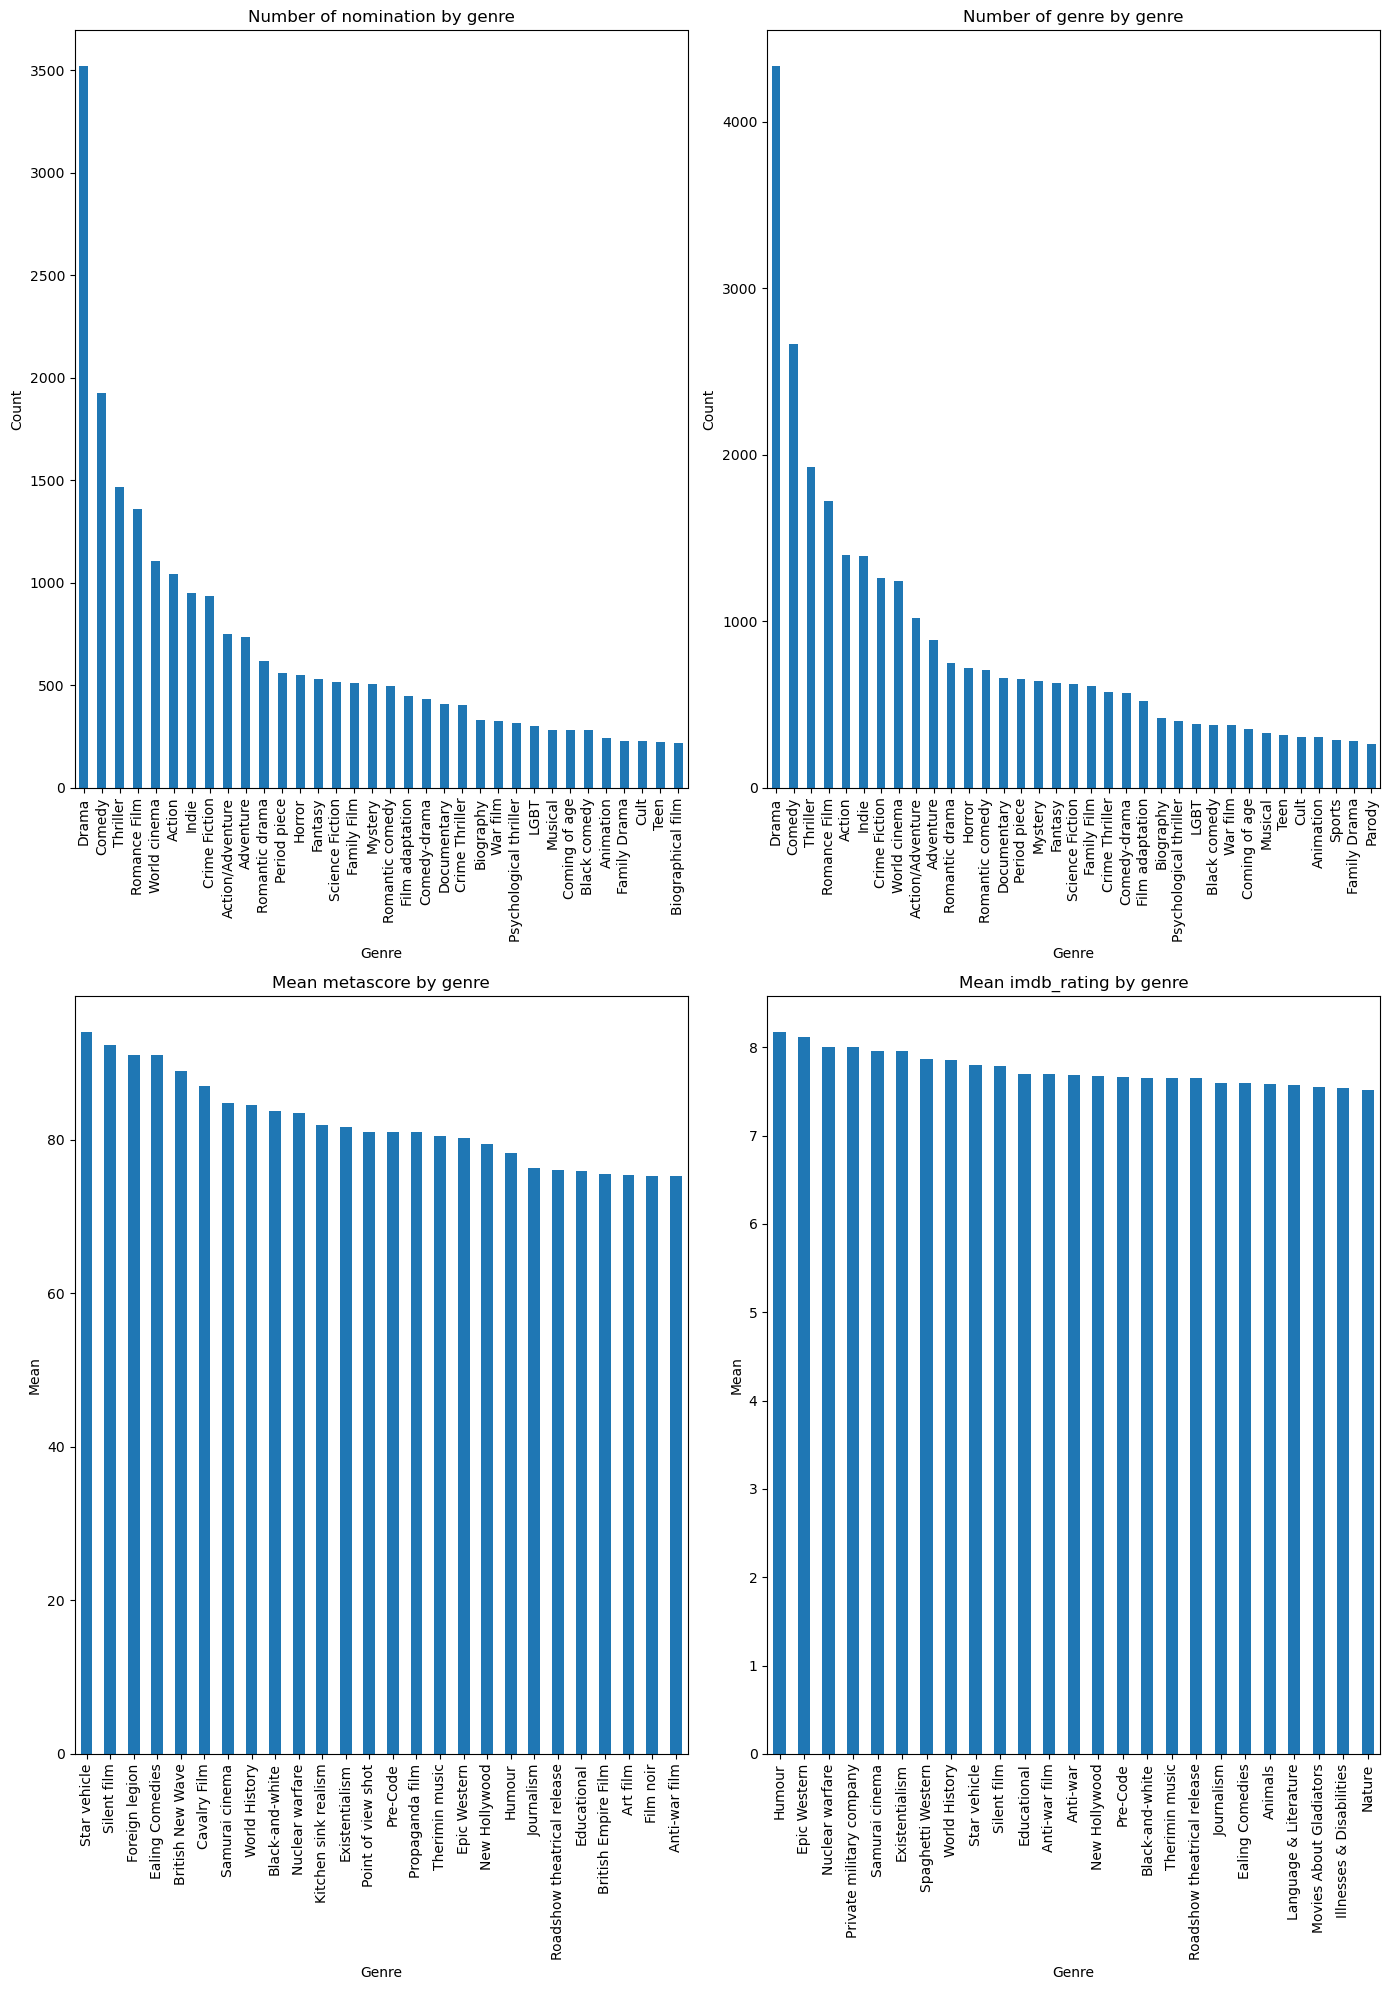

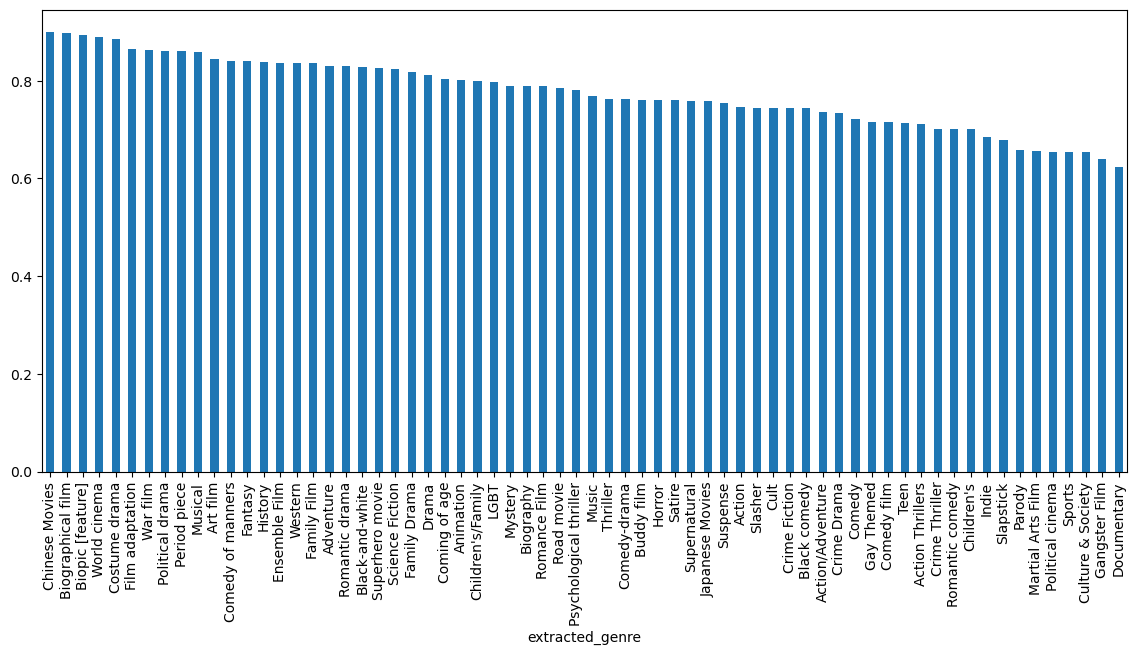

In [139]:
#show number of nomination and awards by genre by group by
print("Number of nomination by genre by group by: ")
display(exploxed_genres.groupby('extracted_genre')['nomination'].sum().sort_values(ascending=False))
print("Number of awards by genre by group by: ")
display(exploxed_genres.groupby('extracted_genre')['award'].sum().sort_values(ascending=False))
print("Number of genre by genre by group by: ")
display(exploxed_genres.groupby('extracted_genre')['extracted_genre'].count().sort_values(ascending=False))

display('percent of awards by film: ' + str(exploxed_genres['award'].sum()/exploxed_genres['award'].count()))

#define subplots 1x2
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 20))

#plot number of nomination by genre when nonimation is bigger then 100 on ax1
exploxed_genres_nomination = exploxed_genres.groupby('extracted_genre')['nomination'].sum().sort_values(ascending=False)
exploxed_genres_nomination = exploxed_genres_nomination[exploxed_genres_nomination > 200]
exploxed_genres_nomination.plot.bar(ax=ax1)
ax1.set_title("Number of nomination by genre")
ax1.set_ylabel("Count")
ax1.set_xlabel("Genre")

#plot count of genre by genre for count bigger than 100
exploxed_genres_genre = exploxed_genres.groupby('extracted_genre')['extracted_genre'].count().sort_values(ascending=False)
exploxed_genres_genre = exploxed_genres_genre[exploxed_genres_genre > 250]
exploxed_genres_genre.plot.bar(ax=ax2)
ax2.set_title("Number of genre by genre")
ax2.set_ylabel("Count")
ax2.set_xlabel("Genre")

#plot the mean metascore by genre for mean bigger than 75
exploxed_genres_metascore = exploxed_genres.groupby('extracted_genre')['metascore'].mean().sort_values(ascending=False)
exploxed_genres_metascore = exploxed_genres_metascore[exploxed_genres_metascore > 75]
exploxed_genres_metascore.plot.bar(ax=ax3)
ax3.set_title("Mean metascore by genre")
ax3.set_ylabel("Mean")
ax3.set_xlabel("Genre")

#plot the mean imdb_rating by genre for mean bigger than 7
exploxed_genres_imdb_rating = exploxed_genres.groupby('extracted_genre')['imdb_rating'].mean().sort_values(ascending=False)
exploxed_genres_imdb_rating = exploxed_genres_imdb_rating[exploxed_genres_imdb_rating > 7.5]
exploxed_genres_imdb_rating.plot.bar(ax=ax4)
ax4.set_title("Mean imdb_rating by genre")
ax4.set_ylabel("Mean")
ax4.set_xlabel("Genre")

#rescale plot
plt.tight_layout()

#displa number of nomination by genre divide by number of film by genre
print("Number of nomination by genre divide by number of film by genre: ")
percentage_nomination_by_genre = (exploxed_genres.groupby('extracted_genre')['nomination'].sum() / exploxed_genres.groupby('extracted_genre')['extracted_genre'].count())
percentage_nomination_by_genre = percentage_nomination_by_genre[exploxed_genres.groupby('extracted_genre')['extracted_genre'].count()>100].sort_values(ascending=False)
display(percentage_nomination_by_genre)
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
percentage_nomination_by_genre.plot.bar()

In [119]:
#explode by language
movies_extracted_language = movies.copy()

movies_extracted_language['extracted_language'] = movies_extracted_language.apply(lambda row: extract_list(row, 'languages'), axis=1)

exploxed_languages = movies_extracted_language.explode('extracted_language')

display(exploxed_languages.head())

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,extracted_language
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,English Language
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12,True,True,1989.0,English Language
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22,True,True,1964.0,English Language
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2,True,True,1999.0,English Language
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3,False,True,2009.0,NaN


Number of nan values in extracted_language:  0
Number of film by language: 


extracted_language
English Language        6497
French Language          790
Spanish Language         538
German Language          383
Italian Language         309
                        ... 
Hopi Language              1
Slovenian language         1
Hmong language             1
Pawnee Language            1
Kinyarwanda language       1
Name: extracted_language, Length: 163, dtype: int64

Number of nomination by language: 


extracted_language
English Language                    4807
French Language                      673
Spanish Language                     464
German Language                      334
Italian Language                     272
                                    ... 
Jamaican Creole English Language       0
Hopi Language                          0
Sumerian                               0
Papiamento language                    0
Friulian Language                      0
Name: nomination, Length: 163, dtype: int64

Number of award by language: 


extracted_language
English Language           4150
French Language             606
Spanish Language            440
German Language             320
Italian Language            252
                           ... 
Khmer, Central Language       0
Hopi Language                 0
Sumerian                      0
Papiamento language           0
Friulian Language             0
Name: award, Length: 163, dtype: int64

Number of nomination by language divide by number of film by language: 


extracted_language
Latin Language         0.967213
Korean Language        0.921053
Standard Mandarin      0.894118
Hindi Language         0.893333
Russian Language       0.891775
Hebrew Language        0.888889
Italian Language       0.880259
Portuguese Language    0.880000
Arabic Language        0.876923
German Language        0.872063
Spanish Language       0.862454
Cantonese              0.855422
French Language        0.851899
Japanese Language      0.778182
English Language       0.739880
dtype: float64

Number of award by language divide by number of film by language: 


extracted_language
German Language      0.835509
Standard Mandarin    0.829412
Spanish Language     0.817844
Italian Language     0.815534
Arabic Language      0.807692
Russian Language     0.805195
French Language      0.767089
Japanese Language    0.730909
English Language     0.638756
dtype: float64

Text(0.5, 0, 'Language')

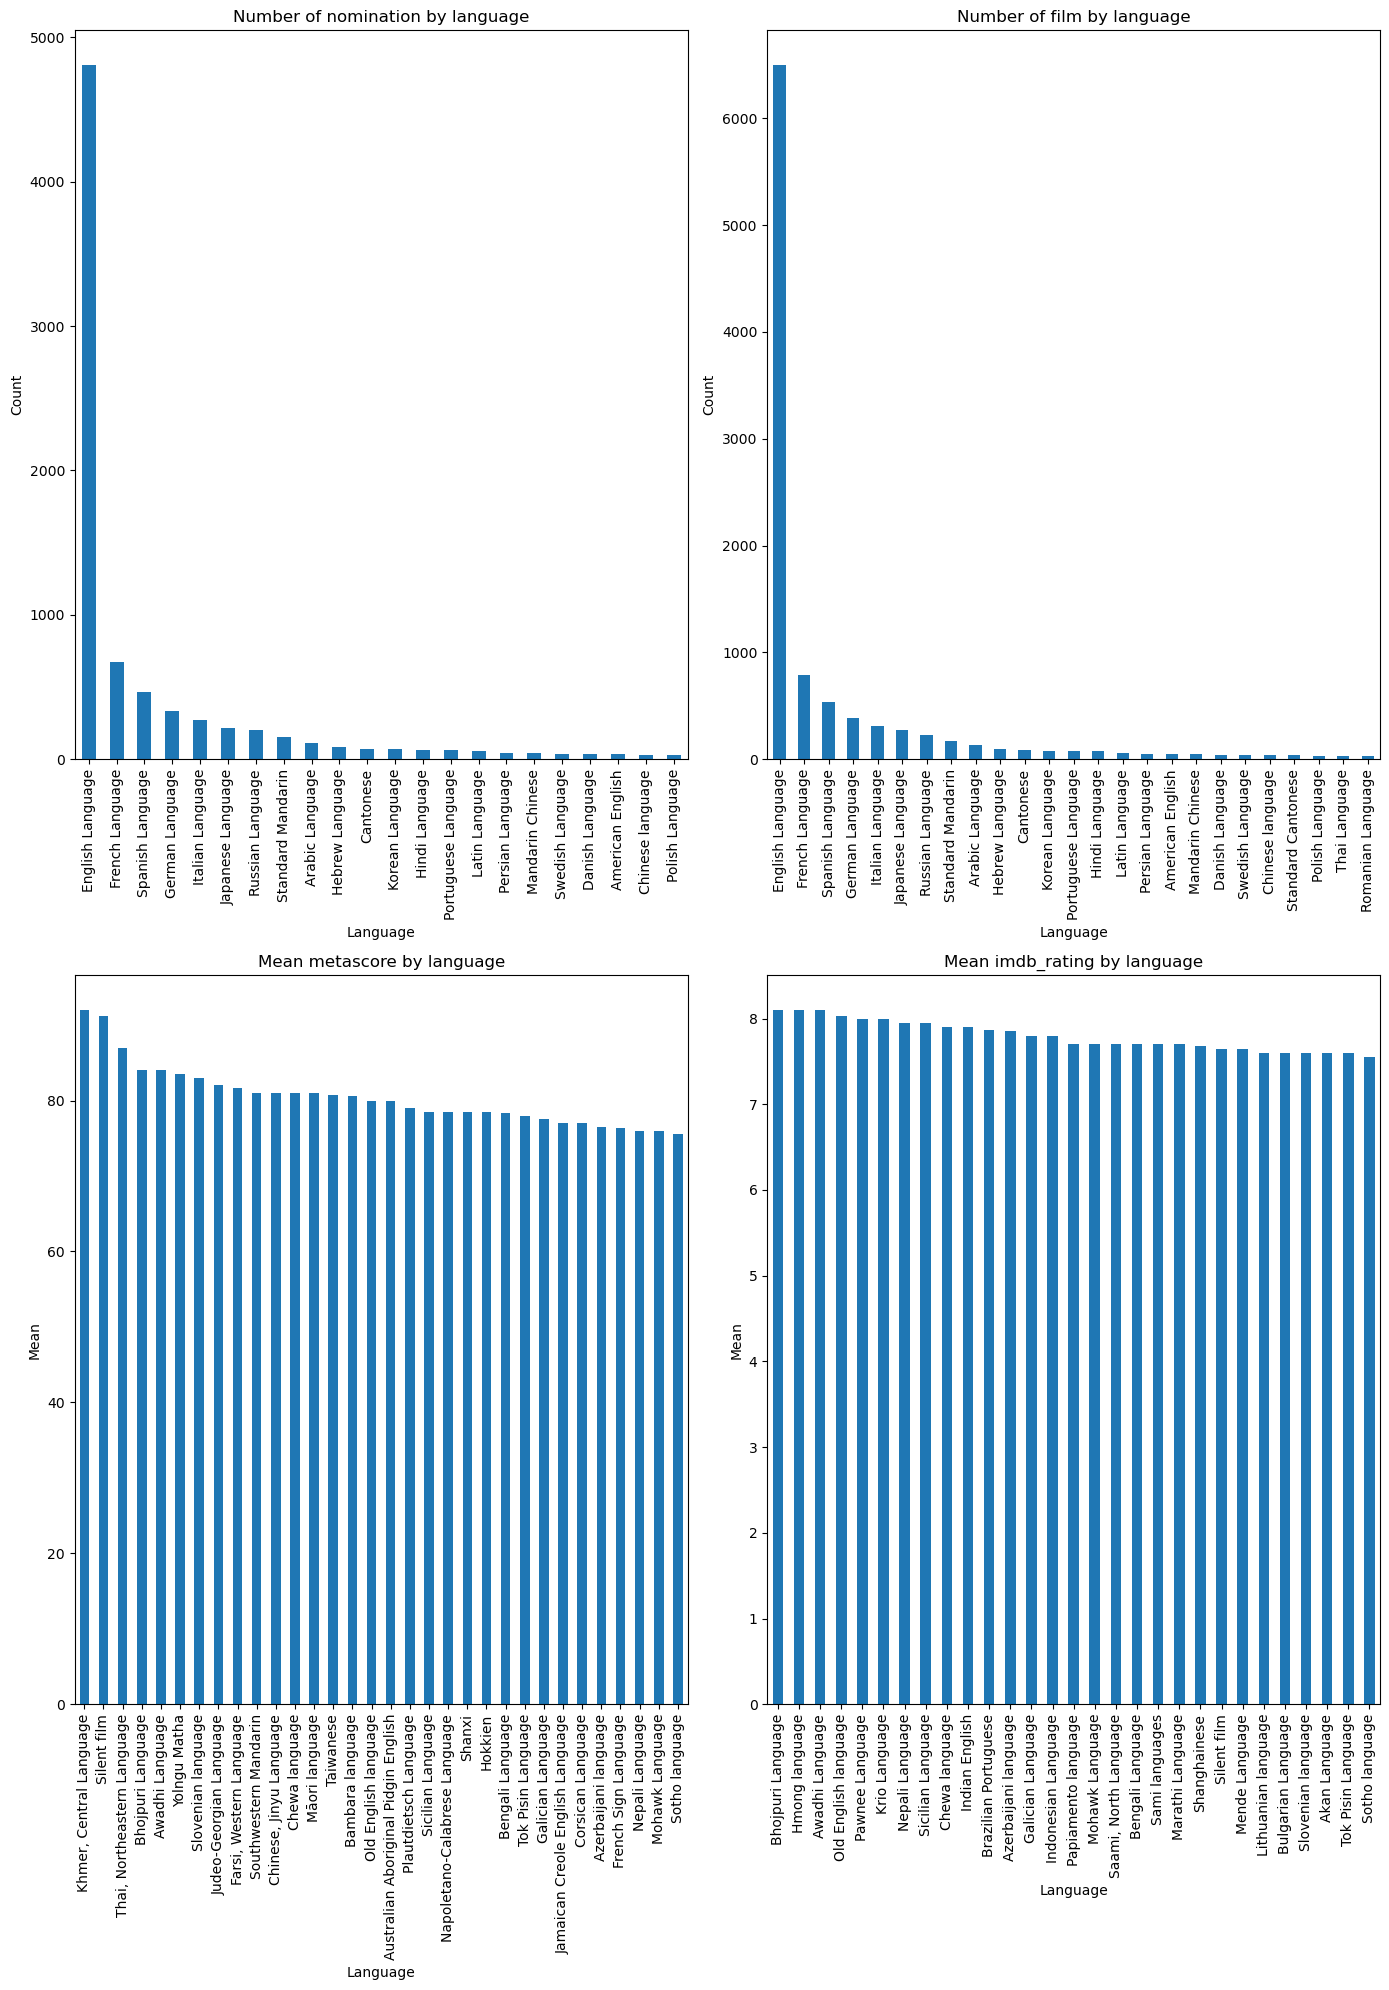

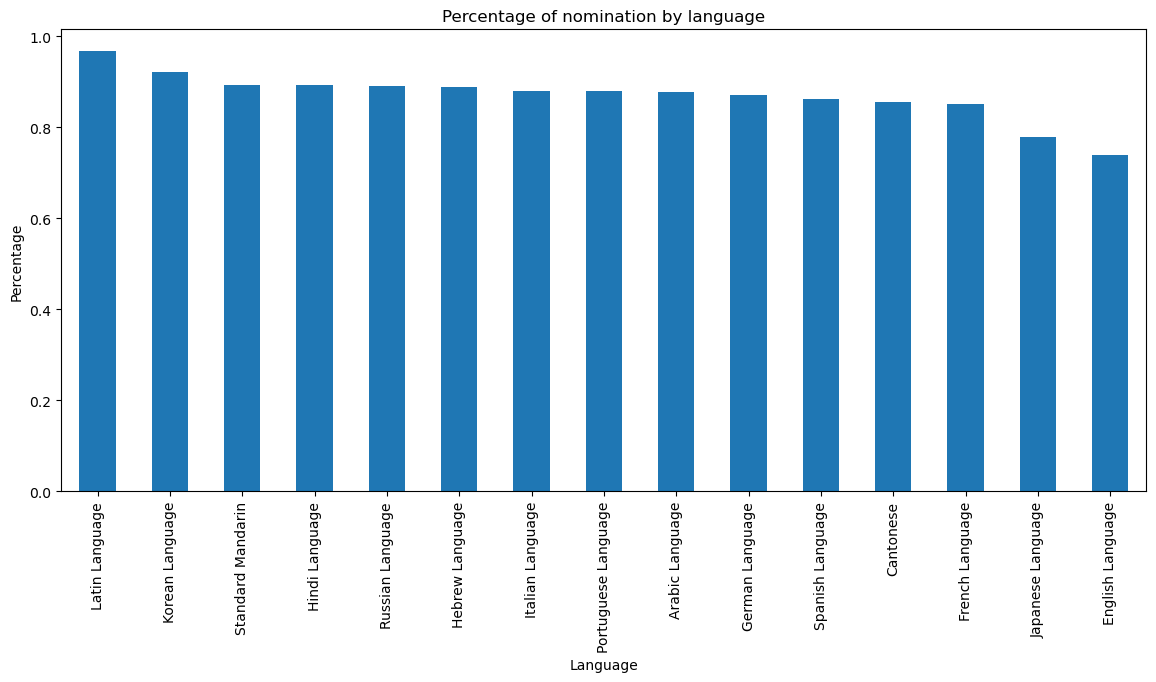

In [141]:
#show number of nan value in extracted_language
print("Number of nan values in extracted_language: ", exploxed_languages['extracted_language'].isna().sum())

#delete nan values in extracted_language
exploxed_languages = exploxed_languages.dropna(subset=['extracted_language'])

#display the number of film by language
print("Number of film by language: ")
display(exploxed_languages.groupby('extracted_language')['extracted_language'].count().sort_values(ascending=False))

#display the number of nomination by language
print("Number of nomination by language: ")
display(exploxed_languages.groupby('extracted_language')['nomination'].sum().sort_values(ascending=False))

#display the number of award by language
print("Number of award by language: ")
display(exploxed_languages.groupby('extracted_language')['award'].sum().sort_values(ascending=False))

#display the number of nomination by language divide by number of film by language
print("Number of nomination by language divide by number of film by language: ")
percentage_nomination_by_language = (exploxed_languages.groupby('extracted_language')['nomination'].sum() / exploxed_languages.groupby('extracted_language')['extracted_language'].count())
percentage_nomination_by_language = percentage_nomination_by_language[exploxed_languages.groupby('extracted_language')['extracted_language'].count()>50].sort_values(ascending=False)
display(percentage_nomination_by_language)

#display the number of award by language divide by number of film by language
print("Number of award by language divide by number of film by language: ")
percentage_award_by_language = (exploxed_languages.groupby('extracted_language')['award'].sum() / exploxed_languages.groupby('extracted_language')['extracted_language'].count())
percentage_award_by_language = percentage_award_by_language[exploxed_languages.groupby('extracted_language')['extracted_language'].count()>100].sort_values(ascending=False)
display(percentage_award_by_language)

#define subplots 1x2
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 20))

#plot number of nomination by language when nonimation is bigger then 100 on ax1
exploxed_languages_nomination = exploxed_languages.groupby('extracted_language')['nomination'].sum().sort_values(ascending=False)
exploxed_languages_nomination = exploxed_languages_nomination[exploxed_languages_nomination > 30]
exploxed_languages_nomination.plot.bar(ax=ax1)
ax1.set_title("Number of nomination by language")
ax1.set_ylabel("Count")
ax1.set_xlabel("Language")

#plot count of language by language for count bigger than 100
exploxed_languages_language = exploxed_languages.groupby('extracted_language')['extracted_language'].count().sort_values(ascending=False)
exploxed_languages_language = exploxed_languages_language[exploxed_languages_language > 30]
exploxed_languages_language.plot.bar(ax=ax2)
ax2.set_title("Number of film by language")
ax2.set_ylabel("Count")
ax2.set_xlabel("Language")

#plot the mean metascore by language for mean bigger than 75
exploxed_languages_metascore = exploxed_languages.groupby('extracted_language')['metascore'].mean().sort_values(ascending=False)
exploxed_languages_metascore = exploxed_languages_metascore[exploxed_languages_metascore > 75]
exploxed_languages_metascore.plot.bar(ax=ax3)
ax3.set_title("Mean metascore by language")
ax3.set_ylabel("Mean")
ax3.set_xlabel("Language")

#plot the mean imdb_rating by language for mean bigger than 7
exploxed_languages_imdb_rating = exploxed_languages.groupby('extracted_language')['imdb_rating'].mean().sort_values(ascending=False)
exploxed_languages_imdb_rating = exploxed_languages_imdb_rating[exploxed_languages_imdb_rating > 7.5]
exploxed_languages_imdb_rating.plot.bar(ax=ax4)
ax4.set_title("Mean imdb_rating by language")
ax4.set_ylabel("Mean")
ax4.set_xlabel("Language")

#rescale plot
plt.tight_layout()


#plot the number of nomination by language divide by number of film by language
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
percentage_nomination_by_language.plot.bar(ax=ax)
ax.set_title("Percentage of nomination by language")
ax.set_ylabel("Percentage")
ax.set_xlabel("Language")



,genre,formula,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
0,Thriller,metascore ~ award,0.152627,45.235294,14.533240,0.000000e+00,2.525061e-71
1,Science Fiction,metascore ~ award,0.155792,43.772021,14.851235,4.590473e-164,1.169013e-24
2,Horror,metascore ~ award,0.133209,40.279570,13.826765,3.435278e-180,3.869265e-24
3,Adventure,metascore ~ award,0.127727,46.034749,14.213659,6.662465e-224,4.079494e-28
4,Supernatural,metascore ~ award,0.185406,38.000000,15.394495,8.463606e-51,7.693259e-10
...,...,...,...,...,...,...,...
61,History,metascore ~ award,0.024687,64.900000,5.520213,2.863793e-83,1.758717e-02
62,Crime Drama,metascore ~ award,0.174620,55.000000,14.905405,1.904582e-42,4.120384e-06
63,Action Thrillers,metascore ~ award,0.207786,40.836364,15.227466,5.102357e-46,5.166372e-09
64,Culture & Society,metascore ~ award,0.148728,61.940299,10.134082,2.649969e-99,4.617312e-08


,genre,formula,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
48,Art film,metascore ~ award,0.032833,69.250000,7.267241,1.763159e-35,0.066993
49,Black-and-white,metascore ~ award,0.018203,79.545455,4.991131,3.086305e-60,0.105662
25,Slapstick,metascore ~ award,0.019781,39.712329,4.787671,8.550200e-44,0.087111


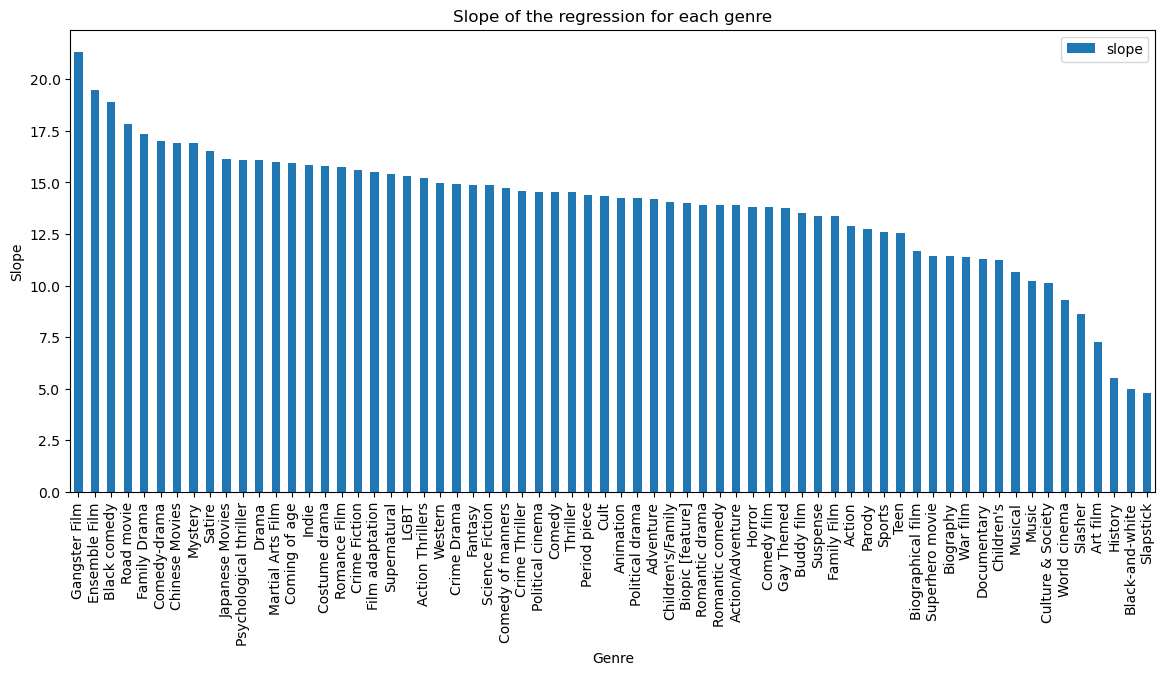

In [161]:
import statsmodels.formula.api as smf

#create a dataframe to store the results with the genre
df_results = pd.DataFrame(columns=['genre', 'formula', 'r_squared', 'intercept', 'slope', 'pvalue_intercept', 'pvalue_slope'])

def linear_regression_helper_bygenre(formula, genre, df, dfr=df_results):
    # We use the ols function that allows us to specify a formula
    df_genre = df[df['extracted_genre'] == genre]
    if len(df_genre) > 100:
        model = smf.ols(formula=formula, data=df_genre)
        results = model.fit()
        #print("The summary of the model for", formula, "for genre", genre, "is:")
        #display(results.summary())
        #store the results in the dataframe
        dfr.loc[len(dfr)] = [genre, formula, results.rsquared, results.params[0], results.params[1], results.pvalues[0], results.pvalues[1]]
        return results

#use the function metascore ~ award for all the genre
for genre in exploxed_genres['extracted_genre'].unique():
    linear_regression_helper_bygenre('metascore ~ award', genre, exploxed_genres)

#display the results
display(df_results)

df_results = df_results.sort_values(by='slope', ascending=False)

#plot the slope of the regression for each genre
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
df_results.plot.bar(x='genre', y='slope', ax=ax)
ax.set_title("Slope of the regression for each genre")
ax.set_ylabel("Slope")
ax.set_xlabel("Genre")

#show the pvalue_slope bigger than 0.05
display(df_results[df_results['pvalue_slope'] > 0.05])

,genre,formula,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
0,Thriller,imdb_rating ~ award,0.141246,5.975770,0.737986,0.000000e+00,9.973818e-66
1,Science Fiction,imdb_rating ~ award,0.147210,5.758031,0.867550,0.000000e+00,2.778631e-23
2,Horror,imdb_rating ~ award,0.121901,5.545520,0.752218,0.000000e+00,4.265959e-22
3,Adventure,imdb_rating ~ award,0.109700,5.952124,0.772240,0.000000e+00,3.751696e-24
4,Supernatural,imdb_rating ~ award,0.164775,5.507692,0.814326,1.607313e-114,8.223532e-09
...,...,...,...,...,...,...,...
61,History,imdb_rating ~ award,0.031879,7.025000,0.308511,5.012459e-153,6.872966e-03
62,Crime Drama,imdb_rating ~ award,0.232374,6.300000,0.908108,1.130417e-77,6.443265e-08
63,Action Thrillers,imdb_rating ~ award,0.222161,5.836364,0.822147,4.246927e-103,1.302949e-09
64,Culture & Society,imdb_rating ~ award,0.011817,7.197015,0.152572,3.027896e-153,1.375518e-01


,genre,formula,r_squared,intercept,slope,pvalue_intercept,pvalue_slope
25,Slapstick,imdb_rating ~ award,0.009442,5.798630,0.207949,1.897712e-89,0.238429
64,Culture & Society,imdb_rating ~ award,0.011817,7.197015,0.152572,3.027896e-153,0.137552


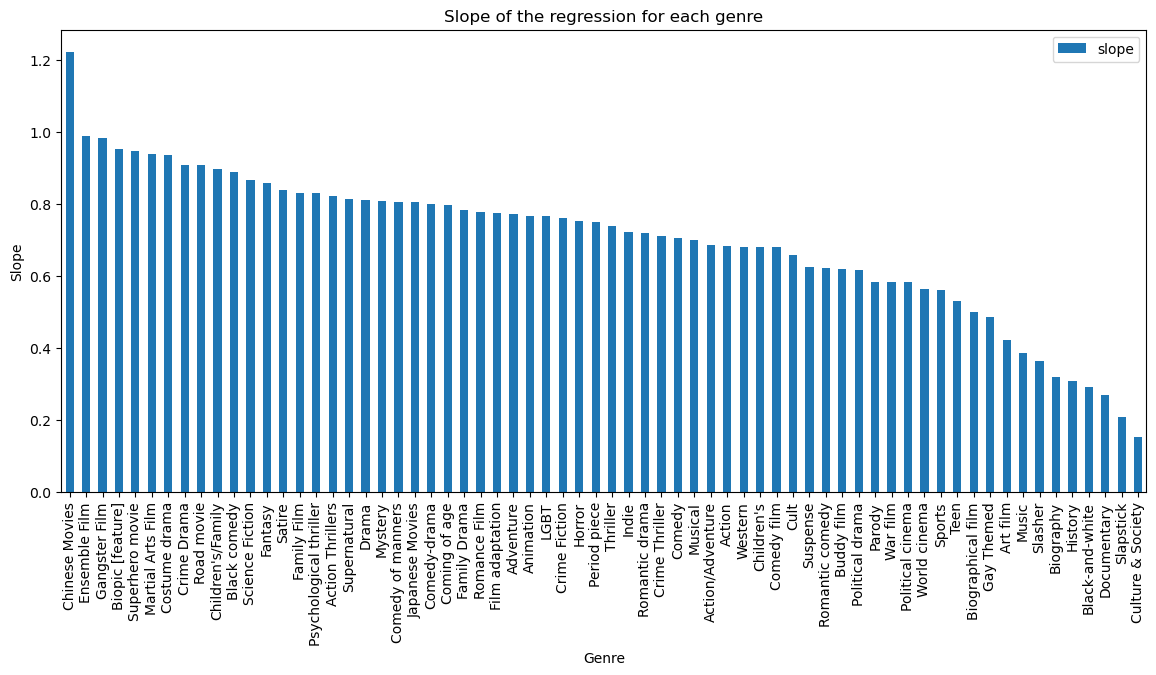

In [162]:
df_results_imdb = pd.DataFrame(columns=['genre', 'formula', 'r_squared', 'intercept', 'slope', 'pvalue_intercept', 'pvalue_slope'])

#use the function imdb_rating ~ award for all the genre
for genre in exploxed_genres['extracted_genre'].unique():
    linear_regression_helper_bygenre('imdb_rating ~ award', genre, exploxed_genres, df_results_imdb)

#display the results
display(df_results_imdb)

df_results_imdb = df_results_imdb.sort_values(by='slope', ascending=False)

#plot the slope of the regression for each genre
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
df_results_imdb.plot.bar(x='genre', y='slope', ax=ax)
ax.set_title("Slope of the regression for each genre")
ax.set_ylabel("Slope")
ax.set_xlabel("Genre")

#show the pvalue_slope bigger than 0.05
display(df_results_imdb[df_results_imdb['pvalue_slope'] > 0.05])


We will know check country and the difference between IMDb ratings and metascore

In [163]:
movies_extracted_country = movies.copy()

movies_extracted_country['extracted_country'] = movies_extracted_country.apply(lambda row: extract_list(row, 'countries'), axis=1)

exploxed_countries = movies_extracted_country.explode('extracted_country')

display(exploxed_countries.head())

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,extracted_country
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,True,False,2001.0,United States of America
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12,True,True,1989.0,United Kingdom
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22,True,True,1964.0,United States of America
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2,True,True,1999.0,United States of America
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3,False,True,2009.0,United States of America


In [169]:
#check if the name of film is unique
print("Number of unique film: ", exploxed_countries['name'].nunique(), " on ", exploxed_countries.shape[0], " films")
#check if the wikipedia_id is unique
print("Number of unique wikipedia_id: ", exploxed_countries['wikipedia_id'].nunique(), " on ", exploxed_countries.shape[0], " films")

#print the percentage of film with more than one country
print("Percentage of film with more than one country: ", 100-exploxed_countries['name'].nunique()/exploxed_countries.shape[0]*100)

#show number of nan value in extracted_country
print("Number of nan values in extracted_country: ", exploxed_countries['extracted_country'].isna().sum())



Number of unique film:  7637  on  11569  films
Number of unique wikipedia_id:  7770  on  11569  films
Percentage of film with more than one country:  33.987380067421554
Number of nan values in extracted_country:  96


In [170]:
#we can remove Nan values
exploxed_countries = exploxed_countries.dropna(subset=['extracted_country'])

A lot of film have more than one country. 

In [190]:
#we add a column rating_difference
exploxed_countries['rating_difference'] = exploxed_countries['imdb_rating']*10 - exploxed_countries['metascore']

display(exploxed_countries.head())

#we can look the mean of metascore by country
print("Mean of metascore by country: ")
display(exploxed_countries.groupby('extracted_country')['metascore'].mean().sort_values(ascending=False))

#we can look the mean of imdb_rating by country
print("Mean of imdb_rating by country: ")
display(exploxed_countries.groupby('extracted_country')['imdb_rating'].mean().sort_values(ascending=False))

#we can look the number of film by country
print("Number of film by country: ")
display(exploxed_countries.groupby('extracted_country')['extracted_country'].count().sort_values(ascending=False))

#we can look the mean of metascore by country for country with more than 50 films
exploxed_countries_principal = exploxed_countries.groupby('extracted_country')['extracted_country'].count().sort_values(ascending=False)
#keep in exlosed countries only the country with more than 50 films
exploxed_countries_principal = exploxed_countries_principal[exploxed_countries_principal > 50]
#keep in exlosed countries only the country with more than 50 films
keep_explosed_countries = exploxed_countries[exploxed_countries['extracted_country'].isin(exploxed_countries_principal.index)]

print("Mean of metascore by country for country with more than 50 films: ")
display(keep_explosed_countries.groupby('extracted_country')['metascore'].mean().sort_values(ascending=False))

#we can look the mean of imdb_rating by country for country with more than 50 films
print("Mean of imdb_rating by country for country with more than 50 films: ")
display(keep_explosed_countries.groupby('extracted_country')['imdb_rating'].mean().sort_values(ascending=False))


/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_50748/2936393437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploxed_countries['rating_difference'] = exploxed_countries['imdb_rating']*10 - exploxed_countries['metascore']


,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,...,imdb_rating,imdb_votes,metascore,count_nomination,count_award,nomination,award,year,extracted_country,rating_difference
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,...,4.9,56930.0,35.0,2,0,True,False,2001.0,United States of America,14.0
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,...,7.5,31214.0,83.0,13,12,True,True,1989.0,United Kingdom,-8.0
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,...,7.8,181857.0,88.0,17,22,True,True,1964.0,United States of America,-10.0
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,...,5.1,5989.0,31.0,2,2,True,True,1999.0,United States of America,20.0
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,...,6.1,545.0,45.0,0,3,False,True,2009.0,United States of America,16.0


Mean of metascore by country: 


extracted_country
Weimar Republic    94.000000
Soviet Union       84.000000
Senegal            82.333333
Mali               81.000000
Cameroon           81.000000
                     ...    
Isle of Man        48.000000
Jamaica            47.000000
Bulgaria           40.250000
Costa Rica         33.000000
Qatar              32.000000
Name: metascore, Length: 115, dtype: float64

Mean of imdb_rating by country: 


extracted_country
Bangladesh                          8.4
Pakistan                            8.4
Weimar Republic                     8.0
Bahamas                             8.0
Palestinian Territories             7.9
                                   ... 
Panama                              6.1
Democratic Republic of the Congo    6.1
Serbia and Montenegro               5.9
Bulgaria                            5.6
Costa Rica                          4.8
Name: imdb_rating, Length: 115, dtype: float64

Number of film by country: 


extracted_country
United States of America    5670
United Kingdom              1136
France                       890
Germany                      659
Canada                       395
                            ... 
Pakistan                       1
Northern Ireland               1
Nigeria                        1
Albania                        1
Serbia                         1
Name: extracted_country, Length: 115, dtype: int64

Mean of metascore by country for country with more than 50 films: 


extracted_country
Sweden                      68.863636
Switzerland                 68.754098
Belgium                     66.741935
Italy                       65.507407
France                      64.980899
Japan                       64.653226
Denmark                     64.355263
South Korea                 64.159420
China                       63.132075
Israel                      63.033898
New Zealand                 62.827160
Ireland                     62.535714
Argentina                   61.846154
Mexico                      61.524590
Spain                       61.181818
United Kingdom              60.823063
Hong Kong                   60.214286
Netherlands                 59.191781
Germany                     57.629742
India                       56.768116
Australia                   55.700000
United States of America    54.802469
Canada                      53.212658
Name: metascore, dtype: float64

Mean of imdb_rating by country for country with more than 50 films: 


extracted_country
Sweden                      7.186364
Denmark                     7.065789
Belgium                     6.986022
Israel                      6.981356
Japan                       6.978226
South Korea                 6.924638
Switzerland                 6.922951
Italy                       6.904815
China                       6.884906
Argentina                   6.821154
Ireland                     6.819048
France                      6.804607
Mexico                      6.791803
Spain                       6.790374
Netherlands                 6.784932
India                       6.760870
New Zealand                 6.739506
United Kingdom              6.729313
Hong Kong                   6.686735
Germany                     6.638543
United States of America    6.445256
Australia                   6.392000
Canada                      6.346835
Name: imdb_rating, dtype: float64

Text(0.5, 0, 'Country')

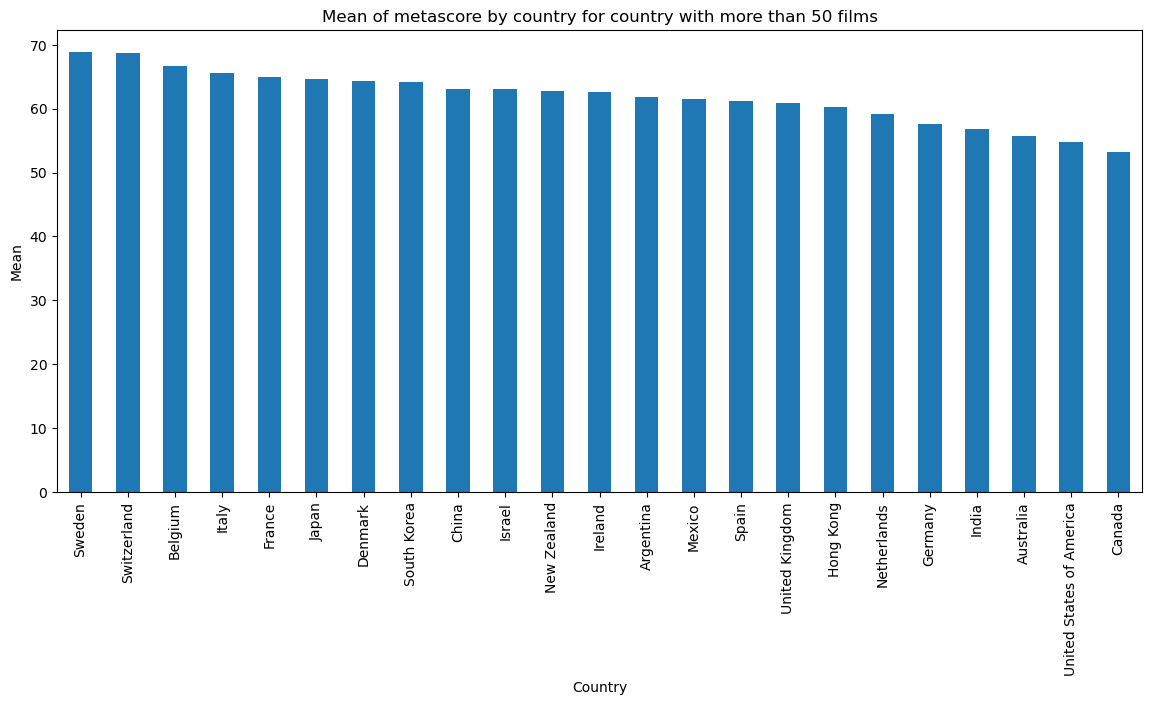

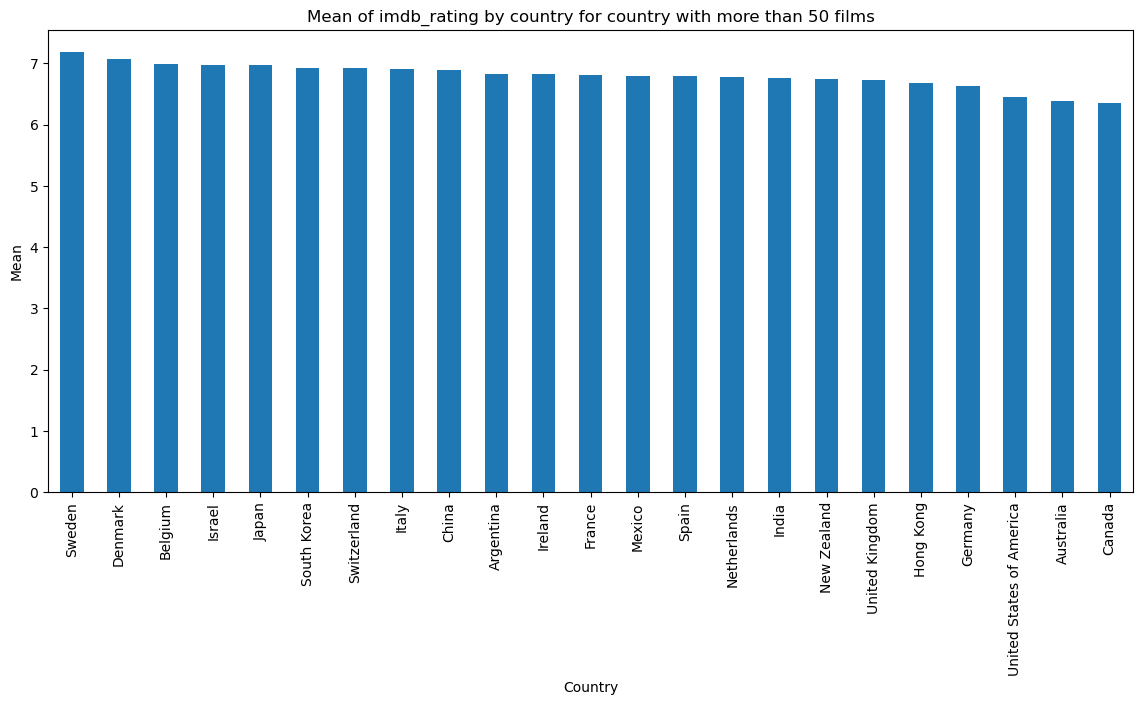

In [191]:
#plot the mean of metascore by country for country with more than 100 films
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
keep_explosed_countries.groupby('extracted_country')['metascore'].mean().sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Mean of metascore by country for country with more than 50 films")
ax.set_ylabel("Mean")
ax.set_xlabel("Country")

#plot the mean of imdb_rating by country for country with more than 100 films
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
keep_explosed_countries.groupby('extracted_country')['imdb_rating'].mean().sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Mean of imdb_rating by country for country with more than 50 films")
ax.set_ylabel("Mean")
ax.set_xlabel("Country")


Text(0.5, 0, 'Country')

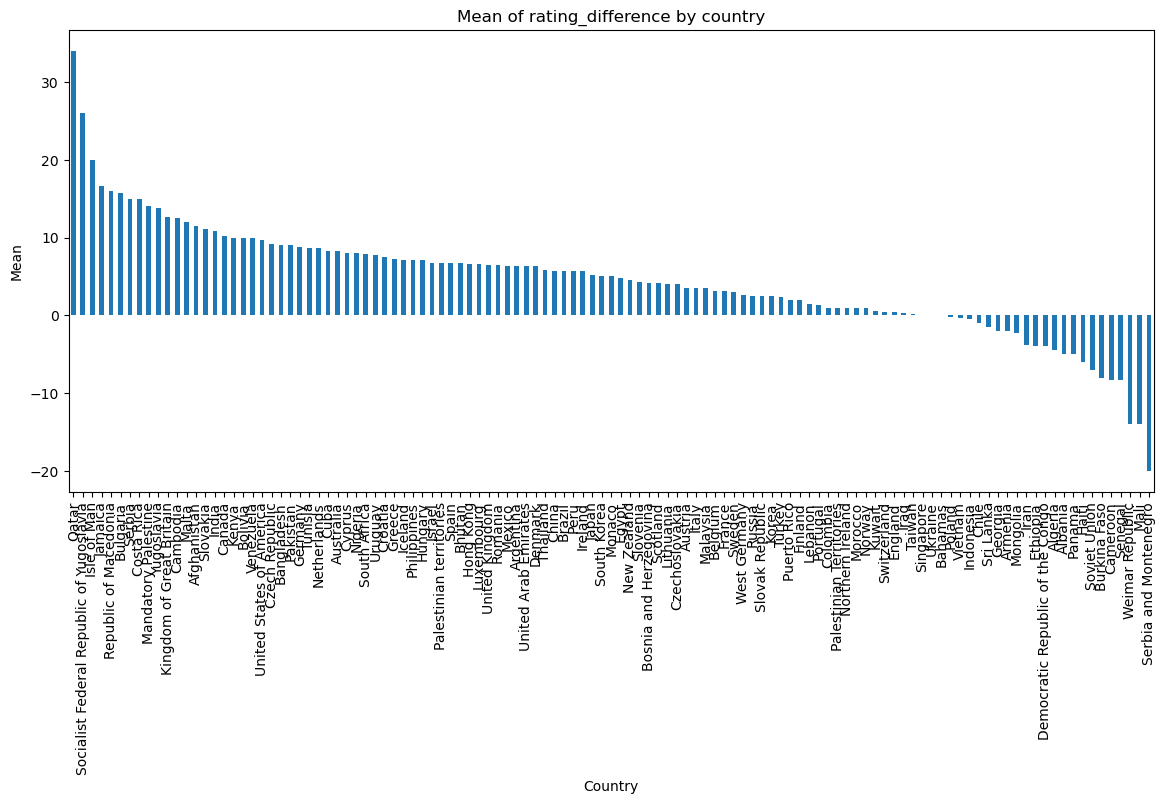

In [192]:
#plot the rating_difference by country for country
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
exploxed_countries.groupby('extracted_country')['rating_difference'].mean().sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Mean of rating_difference by country")
ax.set_ylabel("Mean")
ax.set_xlabel("Country")


The difference seems to be link with countries. We can confirm with country with more than 50 films

Text(0.5, 0, 'Country')

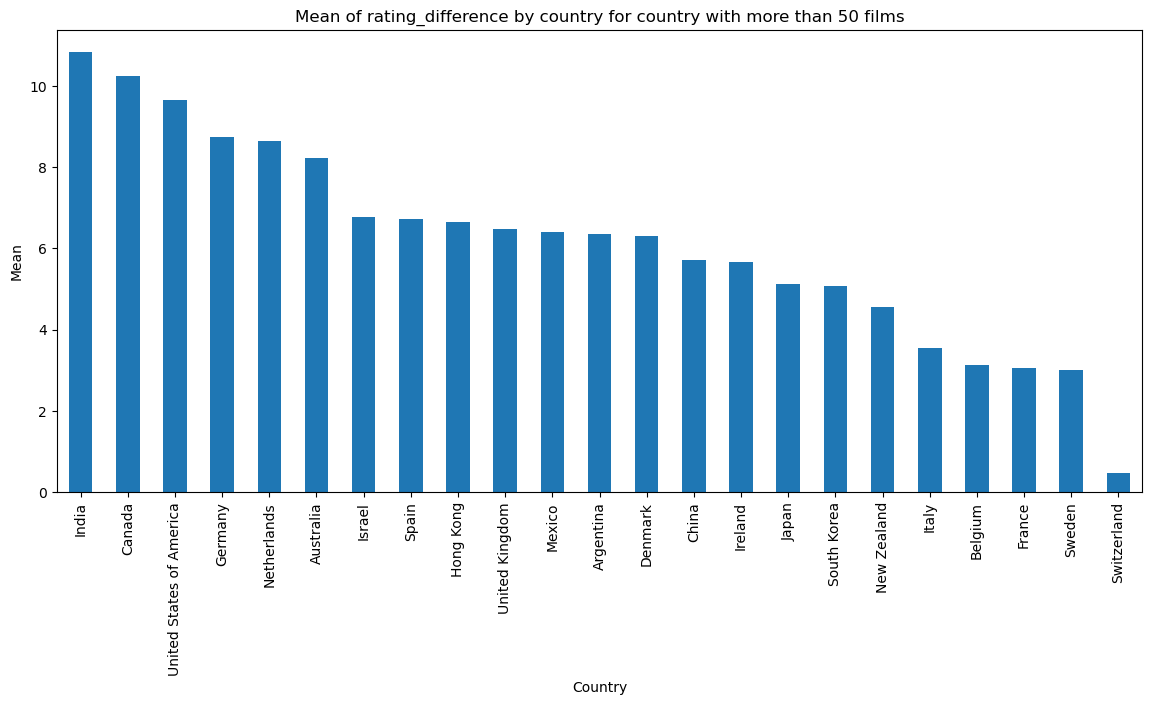

In [193]:
#plot the rating_difference by country for country with more than 50 films
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
keep_explosed_countries.groupby('extracted_country')['rating_difference'].mean().sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Mean of rating_difference by country for country with more than 50 films")
ax.set_ylabel("Mean")
ax.set_xlabel("Country")


In [195]:
#We can add a one hot encoding for each country in movies_one_hot
movies_one_hot = movies.copy()

movies_one_hot['rating_difference'] = movies_one_hot['imdb_rating']*10 - movies_one_hot['metascore']

#we add a column for each country
for country in exploxed_countries['extracted_country'].unique():
    movies_one_hot[country] = np.where(movies_one_hot['countries'].str.contains(country), 1, 0)

display(movies_one_hot.head())

/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_50748/1154975375.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_one_hot[country] = np.where(movies_one_hot['countries'].str.contains(country), 1, 0)
/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_50748/1154975375.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_one_hot[country] = np.where(movies_one_hot['countries'].str.contains(country), 1, 0)
/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_50748/1154975375.py:8: PerformanceW

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,...,Afghanistan,Costa Rica,Cyprus,Czechoslovakia,Armenia,Kenya,Ukraine,Palestinian Territories,Haiti,Serbia and Montenegro
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,...,0,0,0,0,0,0,0,0,0,0
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,...,0,0,0,0,0,0,0,0,0,0
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,...,0,0,0,0,0,0,0,0,0,0
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,...,0,0,0,0,0,0,0,0,0,0
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,...,0,0,0,0,0,0,0,0,0,0


In [196]:
#we can perform an OLS
import statsmodels.api as sm

X = movies_one_hot[exploxed_countries['extracted_country'].unique()]
y = movies_one_hot['rating_difference']

X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

print(model.summary())




                            OLS Regression Results                            
Dep. Variable:      rating_difference   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     5.271
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.71e-63
Time:                        11:52:40   Log-Likelihood:                -30479.
No. Observations:                7770   AIC:                         6.119e+04
Df Residuals:                    7656   BIC:                         6.198e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------